In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
# Load the wine dataset
data = load_wine()
X = data.data
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

In [4]:
# Perform k-means clustering
num_clusters = 3  # You can adjust this value based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
cluster_centers = np.array([X_pca[clusters == i].mean(axis=0) for i in range(num_clusters)])
#cluster_centers = kmeans.cluster_centers_

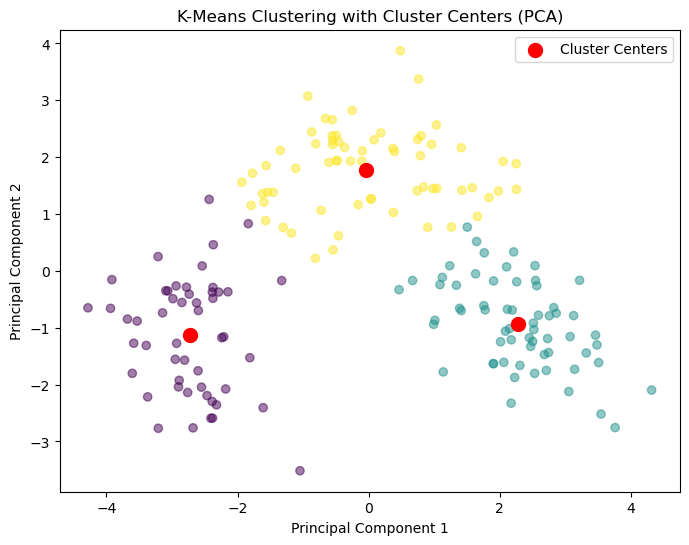

In [5]:
# Plot the clusters and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with Cluster Centers (PCA)')
plt.legend()
plt.show()

In [6]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
clusters = agg_clustering.fit_predict(X_scaled)
cluster_centers = np.array([X_pca[clusters == i].mean(axis=0) for i in range(num_clusters)])

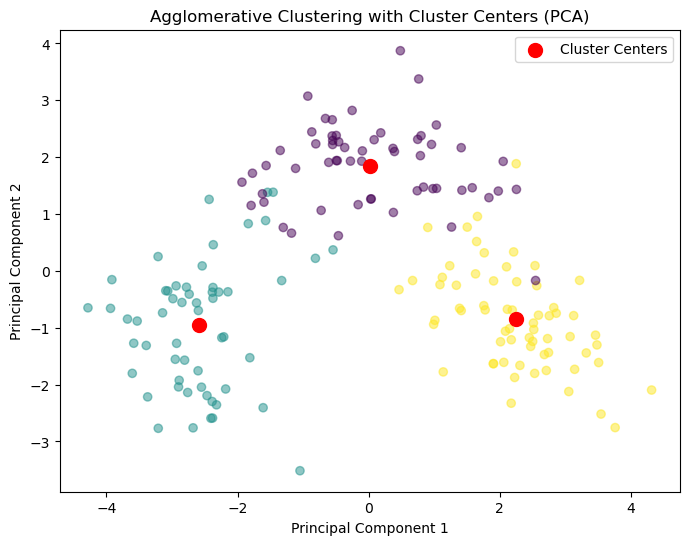

In [7]:
# Plot the clusters and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering with Cluster Centers (PCA)')
plt.legend()
plt.show()

In [8]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=1)  # You can adjust eps and min_samples based on your needs
clusters = dbscan.fit_predict(X_scaled)
cluster_centers = np.array([X_pca[clusters == i].mean(axis=0) for i in range(num_clusters)])

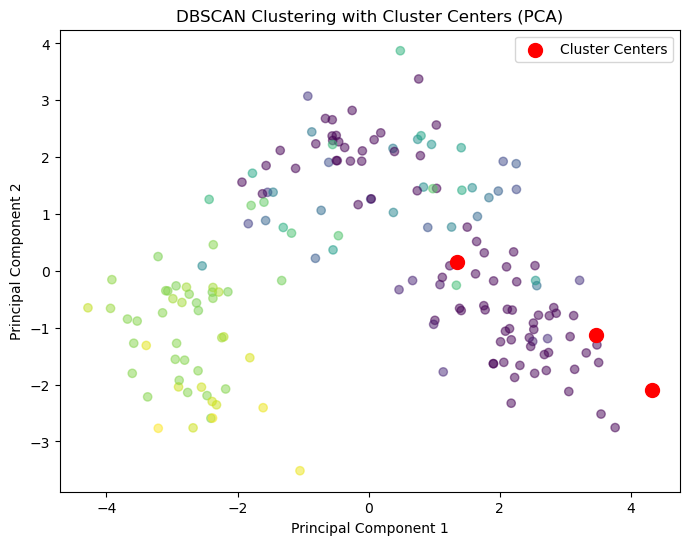

In [9]:
# Plot the clusters and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering with Cluster Centers (PCA)')
plt.legend()
plt.show()